In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [1]:
from eugene import models

In [2]:
model = models.DeepSTARR.load_from_checkpoint("/cellar/users/aklie/projects/ML4GLand/use_cases/deAlmeida22/models/eugene/DeepSTARR.ckpt")

In [4]:
from eugene import settings

In [5]:
settings.dataset_dir = "/cellar/users/aklie/data/eugene"

In [7]:
from eugene import datasets
from eugene import preprocess as pp

In [8]:
sdata_test = datasets.deAlmeida22("test")
pp.ohe_seqs_sdata(sdata_test)

Path /cellar/users/aklie/data/eugene/deAlmeida22 does not exist, creating new folder.
Finished downloading Sequences_Test.fa?download=1
Finished downloading Sequences_activity_Test.txt?download=1



SeqData object modified:
	ohe_seqs: None -> 41186 ohe_seqs added


In [17]:
preds = model.predict(sdata_test.ohe_seqs, batch_size=128).detach().numpy()

In [18]:
preds

array([[ 2.597928  ,  1.0902203 ],
       [ 0.2787927 , -0.2589017 ],
       [ 1.6473565 ,  0.32089677],
       ...,
       [-0.36633873, -0.5662008 ],
       [-0.19394946,  0.32826483],
       [-0.60908985, -0.66063523]], dtype=float32)

In [13]:
res_df = sdata_test.seqs_annot

In [19]:
res_df['Dev_log2_enrichment_scaled_pred'] = preds[:, 0]
res_df['Hk_log2_enrichment_scaled_pred'] = preds[:, 1]

In [20]:
res_df


,Dev_log2_enrichment,Hk_log2_enrichment,Dev_log2_enrichment_scaled,Hk_log2_enrichment_scaled,Dev_log2_enrichment_quantile_normalized,Hk_log2_enrichment_quantile_normalized,Dev_log2_enrichment_scaled_pred,Hk_log2_enrichment_scaled_pred
chr2R_10574736_10574984_+_positive_peaks,3.418306,1.983081,2.019106,1.249387,3.722761,2.231366,2.597928,1.090220
chr2R_10577049_10577297_+_positive_peaks,2.211545,-0.379982,1.225755,-0.182038,1.893053,-0.146984,0.278793,-0.258902
chr2R_10600762_10601010_+_positive_peaks,3.483831,1.434863,2.062184,0.917304,3.808864,1.773922,1.647357,0.320897
chr2R_10601947_10602195_+_positive_peaks,1.739022,0.147684,0.915108,0.137596,1.383562,0.440031,1.646005,0.790095
chr2R_10605176_10605424_+_positive_peaks,4.829350,0.794047,2.946757,0.529130,5.325903,1.138698,1.352599,0.240036
...,...,...,...,...,...,...,...,...
chr2R_21141601_21141849_-_negative,0.104630,-0.644837,-0.159378,-0.342474,-0.126663,-0.437401,-0.580536,-0.226378
chr2R_21141901_21142149_-_negative,-1.318970,0.663313,-1.095283,0.449938,-1.506605,0.991691,-0.569130,-0.684690
chr2R_21142401_21142649_-_negative,0.681030,-2.151505,0.219561,-1.255139,0.395427,-1.949659,-0.366339,-0.566201
chr2R_21142501_21142749_-_negative,1.144431,-1.877330,0.524210,-1.089057,0.832398,-1.685165,-0.193949,0.328265


In [22]:
# plot the predictions in a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

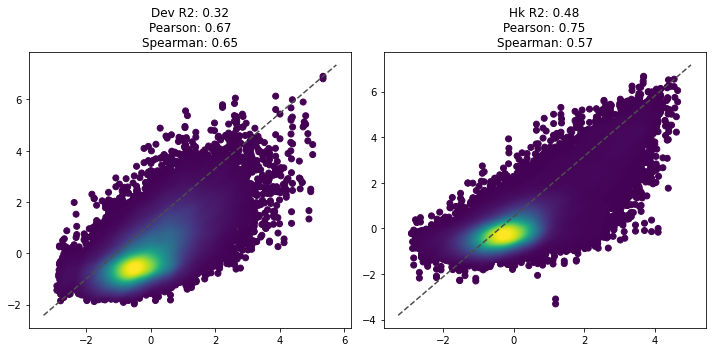

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Get point densities
x = res_df['Dev_log2_enrichment_scaled']
y = res_df['Dev_log2_enrichment_scaled_pred']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax[0].scatter(x, y, c=z)

# Get point densities
x = res_df['Hk_log2_enrichment_scaled']
y = res_df['Hk_log2_enrichment_scaled_pred']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax[1].scatter(x, y, c=z)

# Add metrics to the plots
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

r2_dev = r2_score(res_df['Dev_log2_enrichment_scaled'], res_df['Dev_log2_enrichment_scaled_pred'])
r2_hk = r2_score(res_df['Hk_log2_enrichment_scaled'], res_df['Hk_log2_enrichment_scaled_pred'])

pearson_dev = pearsonr(res_df['Dev_log2_enrichment_scaled'], res_df['Dev_log2_enrichment_scaled_pred'])
pearson_hk = pearsonr(res_df['Hk_log2_enrichment_scaled'], res_df['Hk_log2_enrichment_scaled_pred'])

spearman_dev = spearmanr(res_df['Dev_log2_enrichment_scaled'], res_df['Dev_log2_enrichment_scaled_pred'])
spearman_hk = spearmanr(res_df['Hk_log2_enrichment_scaled'], res_df['Hk_log2_enrichment_scaled_pred'])

ax[0].set_title(f"Dev R2: {r2_dev:.2f}\nPearson: {pearson_dev[0]:.2f}\nSpearman: {spearman_dev[0]:.2f}")
ax[1].set_title(f"Hk R2: {r2_hk:.2f}\nPearson: {pearson_hk[0]:.2f}\nSpearman: {spearman_hk[0]:.2f}")

# Add a diagonal line to the plots
ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")
ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls="--", c=".3")

plt.tight_layout()
plt.show()

# Interpret

In [24]:
import seqexplainer as se

In [35]:
contribs = se.attribute(
    model, 
    sdata_test.ohe_seqs,
    method="GradientShap",
    reference_type="zero",
    target=0,
    batch_size=128
)

KeyboardInterrupt: 

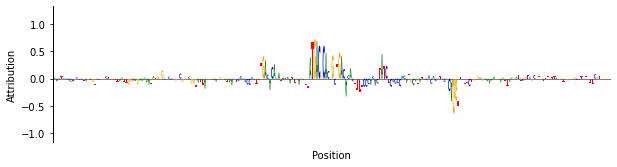

In [34]:
se._attributions.plot_attribution_logo(
    contribs[0],
)